In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display, Image
from PIL import Image as PILImage
%matplotlib inline


In [2]:
# Ask the user for basic information
def get_user_info():
    print("Welcome to our health system. Please enter your information: ")
    
    print("----------------------------------")
    while True:
        name = input("- User Name: ")
        if not name:
            print("Please enter username again.")
            continue
        break
    
    print("----------------------------------")
    while True:
        age = input("- Age: ")
        if age.isdigit() and 0 < int(age) < 130:
            age = int(age)
            break
        print("Please enter an integer between 1 and 130.")
    
    print("----------------------------------")
    while True:
        sex = input("- Gender(Male/Female): ")
        if sex in ["Male", "Female"]:
            break
        print("Please enter Male or Female")
    
    print("----------------------------------")
    while True:
        try:
            height = float(input("- Height(in meters): "))
            if height > 0 and height < 2.5:
                break
            else:
                print("Please enter your real height(in meter).")
        except ValueError:
            print("Please enter your height.")
    
    print("----------------------------------")
    while True:
        try:
            weight = float(input("- Weight(in kg): "))
            if weight > 0:
                break
            else:
                print("Please enter your real weight.")
        except ValueError:
            print("Please enter your weight.")
    
    print("----------------------------------")
    activity_levels_list = ["Sedentary", "Lightly Active", "Moderately Active", "Very Active", "Extra Active"]
    while True:
        activity_level = input('''
    Sedentary: Little to no exercise. Spend most of the day seated.
    Lightly Active: Light exercise for 30 minutes per day, 3-5 times a week.
    Moderately Active: Moderate exercise for 1 hour per day, 3-5 times a week.
    Very Active: Intense exercise for 1 hour per day, 5-7 times a week.
    Extra Active: Intense exercise for at least 2 hours every day.
    
    - Choose your activity level:
    ''')
        if activity_level in activity_levels_list:
            break
        print("Please enter Sedentary/Lightly Active/Moderately Active/Very Active/Extra Active.")
    
    print("----------------------------------")
    targets_list = ["lose weight", "maintain weight", "muscle building"]
    while True:
        target = input("Target(lose weight/maintain weight/muscle building): ")
        if target in targets_list:
            break
        print("Please enter lose weight/maintain weight/muscle building.")
   
    return{
        "name" : name,
        "age" : age,
        "sex" : sex,
        "height" : height,
        "weight" : weight,
        "activity level" : activity_level,
        "target" : target,
    }

In [3]:
path = %pwd
excel_name = 'user_info.xlsx'
excel_path = os.path.join(path, excel_name)

In [4]:
# Store collected user information in excel
def data_update(user_info, fileName = excel_path):
    try:
        df = pd.read_excel(fileName)
# if there is no 'user_info' in this path, create a new one (dataframe)
    except FileNotFoundError:
        df = pd.DataFrame(columns=user_info.keys())
# Add the newly entered user information to the dataframe and then write it to an Excel file
    new_row = pd.DataFrame([user_info])
    df = pd.concat([df, new_row], ignore_index=True)
    df.to_excel(fileName, index=False)

In [5]:
# A set of multipliers used for subsequent calculations
activity_level_multipliers = {
    "Sedentary": 1.2,
    "Lightly Active": 1.375,
    "Moderately Active": 1.55,
    "Very Active": 1.725,
    "Extra Active": 1.9,
}

In [6]:
def calc_bmi_bmr_tdee(user_info):
    height = user_info['height']
    weight = user_info['weight']
    age = user_info['age']
    sex = user_info['sex']
    activity_level = user_info['activity level']
    
    
# Calculate bmi (Body Mass Index)
    bmi = weight / (height ** 2)
    
    if bmi >= 32:
        health_status = 'Severe Obesity'
    elif bmi >= 28:
        health_status = 'Obesity'
    elif bmi >= 24:
        health_status = 'Overweight'
    elif bmi >= 18.5:
        health_status = 'Normal'
    else:
        health_status = 'Underweight'
        
    
# Use Mifflin-ST Jeor Equation to calculate the BMR (Basal Metabolic Rate)
    if sex == "Female":
        bmr = (10 * weight) + (6.25 * 100 * height) - (5 * age) - 161
    elif sex == "Male":
        bmr = (10 * weight) + (6.25 * 100 * height) - (5 * age) + 5
    else:
        print("Please enter your sex again.")
        
    
# Calculate the TDEE (Total Daily Energy Expenditure)
    tdee = bmr * activity_level_multipliers[activity_level]
    
    bmi = round(bmi, 2)
    bmr = round(bmr, 2)
    tdee = round(tdee, 2)
    
    
    return bmi, health_status, bmr, tdee

In [7]:
# Calculate the macro nutrients and daily calories bassed on user target
def nutrient_distribution(user_info, tdee):
    target = user_info["target"]
    
    if target == "lose weight":
        recommended_calories = tdee * 0.80
        
        protein_intake_percentage = 30
        fat_intake_percentage = 25
        carb_intake_percentage = 45
    
    elif target == "maintain weight":
        recommended_calories = tdee
        
        protein_intake_percentage = 25
        fat_intake_percentage = 30
        carb_intake_percentage = 45
    
    elif target == "muscle building":
        recommended_calories = tdee * 1.20
        
        protein_intake_percentage = 35
        fat_intake_percentage = 20
        carb_intake_percentage = 45
        
    protein_intake = (recommended_calories * protein_intake_percentage / 100) / 4
    fat_intake = (recommended_calories * fat_intake_percentage / 100) / 9
    carb_intake = (recommended_calories * carb_intake_percentage / 100) / 4
    
    protein_intake = round(protein_intake, 2)
    fat_intake = round(fat_intake, 2)
    carb_intake = round(carb_intake, 2)
    recommended_calories = round(recommended_calories, 2)
    
    return {"Protein: " : protein_intake, "Fat: " : fat_intake, "Carb: " : carb_intake, "Recommended Calories": recommended_calories}

In [8]:
# Add the above calculated results to Excel to enhance user profiles.
def user_info_update(user_info, bmi, health_status, bmr, tdee, recommended_calories, fileName = excel_path):
    try:
        df = pd.read_excel(fileName)
    except FileNotFoundError:
        df = pd.DataFrame(columns=[*user_info.keys(), 'BMI', 'Health Status', 'BMR', 'TDEE', 'Recommended Calories'])
    
    
    complete_info = user_info.copy()# Make a backup to prevent data loss
    complete_info.update({
        'BMI': bmi,
        'Health Status': health_status,
        'BMR': bmr,
        'TDEE': tdee,
        'Recommended Calories': recommended_calories
    })
    
    new_row = pd.DataFrame([complete_info])
    df = pd.concat([df, new_row], ignore_index=True)
    df.to_excel(fileName, index=False)

In [9]:
# Create a bar chart for TDEE and recommended calories to visualize the difference between them
def tdee_cal_repo(tdee, recommended_calories):
    labels = ['TDEE', 'Recommended Calories']
    values = [tdee, recommended_calories]
    
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(labels, values, color=['#eeb4b4', '#8b6969'])
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
        
    plt.ylabel('Calories')
    plt.title('TDEE vs Recommended Calories Report')
    
    ax.set_facecolor('#f2f0eb')
    ax.spines['bottom'].set_color('#d3d3d3')
    ax.spines['top'].set_color('#d3d3d3')
    ax.spines['right'].set_color('#d3d3d3')
    ax.spines['left'].set_color('#d3d3d3')
    ax.tick_params(axis='x', colors='#333333')
    ax.tick_params(axis='y', colors='#333333')

    plt.show()

In [10]:
# Visualize the intake amounts and proportions of macro nutrients
def nutrient_repo(nutrients):
    nutrients_for_plot = {k: v for k, v in nutrients.items() if k != "Recommended Calories"}
    
    labels = list(nutrients_for_plot.keys())
    sizes = list(nutrients_for_plot.values())
    total_calories = sum(sizes)
    percentages = [size / total_calories * 100 for size in sizes]
    
    
    fig, axs = plt.subplots(2, 1, figsize=(8, 10), facecolor='#f2f0eb')
    # pie chart
    colors = ['#eeb4b4', '#ff6a6a', '#8b6969']
    axs[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[0].axis('equal')
    axs[0].set_title('Nutrient Distribution')
    
    # bar chart
    bars = axs[1].bar(labels, sizes, color=['#eeb4b4', '#ff6a6a', '#8b6969'])
    axs[1].set_ylabel('Intake (calories)')
    axs[1].set_title('Nutrient Intake')
    
    for bar in bars:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    
    plt.tight_layout()
    plt.show()

# Cases (you can paste them when input) : 

+++Case 1: A male with slight malnutrition and a need for muscle gain.
 
Jack   
23   
Male   
1.76   
48   
Lightly Active   
muscle building   
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++Case 2: A healthy woman looking to maintain her current figure.

Emma    
21   
Female   
1.72  
60  
Moderately Active  
maintain weight        
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++Case 3: A overweight man looking to lose weight.

Bob  
45  
Male  
1.83  
102  
Sedentary  
lose weight       

Welcome to our health system. Please enter your information: 
----------------------------------
- User Name: Emma
----------------------------------
- Age: 21
----------------------------------
- Gender(Male/Female): Female
----------------------------------
- Height(in meters): 1777777777
Please enter your real height(in meter).
- Height(in meters): 1.71
----------------------------------
- Weight(in kg): 60
----------------------------------

    Sedentary: Little to no exercise. Spend most of the day seated.
    Lightly Active: Light exercise for 30 minutes per day, 3-5 times a week.
    Moderately Active: Moderate exercise for 1 hour per day, 3-5 times a week.
    Very Active: Intense exercise for 1 hour per day, 5-7 times a week.
    Extra Active: Intense exercise for at least 2 hours every day.
    
    - Choose your activity level:
    Moderately Active
----------------------------------
Target(lose weight/maintain weight/muscle building): maintain weight

---------------------

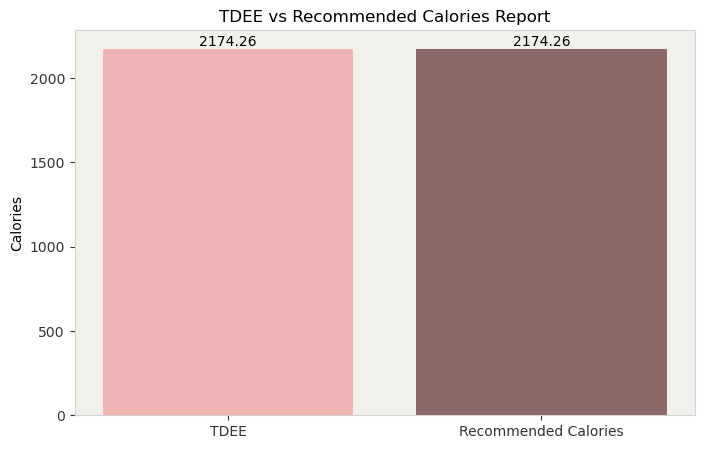

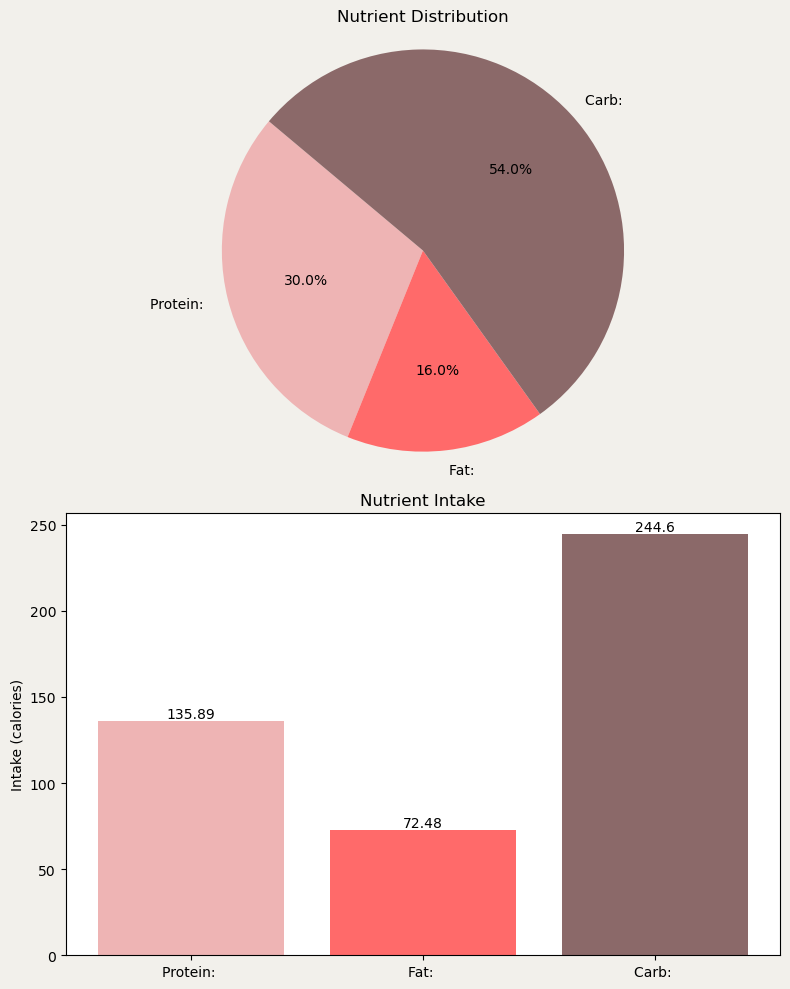

In [11]:
# Call the above functions
user_info = get_user_info()

bmi, health_status, bmr, tdee = calc_bmi_bmr_tdee(user_info)
print(f'''
----------------------------------
- BMI: {bmi}
- Health Status: {health_status}
- BMR: {bmr}
- TDEE: {tdee}
''')

nutrients = nutrient_distribution(user_info, tdee)

recommended_calories = nutrients['Recommended Calories']
print("- Recommended Calories: ", recommended_calories)
print("----------------------------------")

# add the info below into excel
user_info_update(user_info, bmi, health_status, bmr, tdee, recommended_calories)


tdee_cal_repo(tdee, recommended_calories)
nutrient_repo(nutrients)

# Cases (you can paste them when input) : 
+++Case 1:
Jack: Not picky about food and doesn't have any food allergies.  

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++   
+++Case 2:   
Emma: Allergic to milk and peanuts, doesn't like spicy food.     
milk,peanuts,pepper     

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++   
+++Case 3:   
Bob: Doesn't like to eat onions and celery.   
onion,celery   

In [12]:
# Generate recipe based on user preference and recommended calories
def recommended_recipe(calories):
# Import the recipe information file
    path = os.getcwd()
    recipe_filename = 'recipe_info.xlsx'
    recipe_filepath = os.path.join(path, recipe_filename)
    df = pd.read_excel(recipe_filepath) 
    
# User preference
    disliked_ingredients = input("Please tell us what ingredients you don't want to eat (separate with ','): ")
    if not disliked_ingredients:
        disliked_list = []
    else:
        disliked_list = [item.strip() for item in disliked_ingredients.split(',')]
    
# Filter rows that don't contain the ingredients above
    filtered_df = df.copy()
    for ingredient in disliked_list:
        filtered_df = filtered_df[~filtered_df['Ingredients List'].str.contains(ingredient, case=False, na=False)]
        
    available_recipes = filtered_df[filtered_df['Calories'] <= calories]
    
# Attempting to find recipe combinations with a calorie total closest to the recommended value
    selected_recipes = pd.DataFrame()
    remaining_calories = calories
    
    while not available_recipes.empty and remaining_calories > 0 and len(selected_recipes) < 6:
        idx = (available_recipes['Calories'] - remaining_calories).abs().idxmin()
        selected_recipe = available_recipes.loc[[idx]]
        selected_recipes = pd.concat([selected_recipes, selected_recipe])
        remaining_calories -= selected_recipe['Calories'].values[0]
        available_recipes = available_recipes.drop(idx)
    
    print("\nAccording to your preference, the recommended recipes are as follows:")
    print("------------------------------------------------------------------------------")
    print(selected_recipes[['Dish Name', 'Calories', 'Cooking Time (min)']].to_string(index=False, justify='left'))
    print("------------------------------------------------------------------------------")
    print(" ")
    total_calories = selected_recipes['Calories'].sum()
    print(f"Total Intake Calories: {total_calories}")
    total_cooking_time = selected_recipes['Cooking Time (min)'].sum()
    print(f"Total Cooking Time: {total_cooking_time} min")
    
# Displaying the images and nutrient proportions for each recommended recipe
    for index, row in selected_recipes.iterrows():
        image_filename = f"{index + 1}.jpg"
        image_path = os.path.join(path, image_filename)
        if os.path.exists(image_path):
            pil_image = PILImage.open(image_path)
            resized_image = pil_image.resize((100, 100))
            
            fig, axs = plt.subplots(1, 2, figsize=(6, 3))
            
            # recipe image
            axs[0].imshow(resized_image)
            axs[0].axis('off') 
            
            # nutrient proportions
            nutrients = ['Protein (g)', 'Fat (g)', 'Carbohydrate (g)']
            nutrients_values = [row[nutrient] for nutrient in nutrients]
            colors = ['#eeb4b4', '#ff6a6a', '#8b6969']
            axs[1].pie(nutrients_values, labels=nutrients, autopct='%1.1f%%', colors=colors)
            axs[1].set_title(f"Recipe Image and Nutrient Distribution for '{row['Dish Name']}'")
            
            plt.tight_layout()
            plt.show()

Please tell us what ingredients you don't want to eat (separate with ','): milk,peanuts,pepper

According to your preference, the recommended recipes are as follows:
------------------------------------------------------------------------------
Dish Name                           Calories  Cooking Time (min)
Potato and Cheese Lentil Casserole 1416       65                
                         Beef Stew  745      180                
     Dijon Garlic Brussels Sprouts  145       40                
------------------------------------------------------------------------------
 
Total Intake Calories: 2306
Total Cooking Time: 285 min


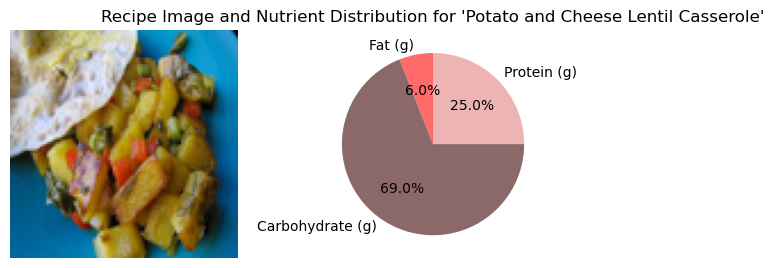

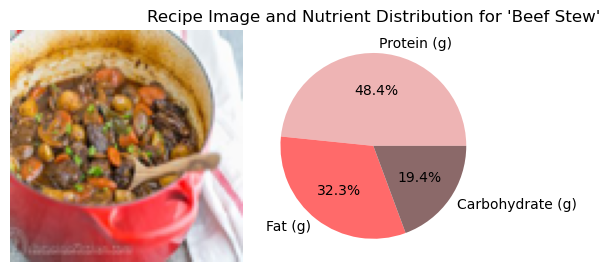

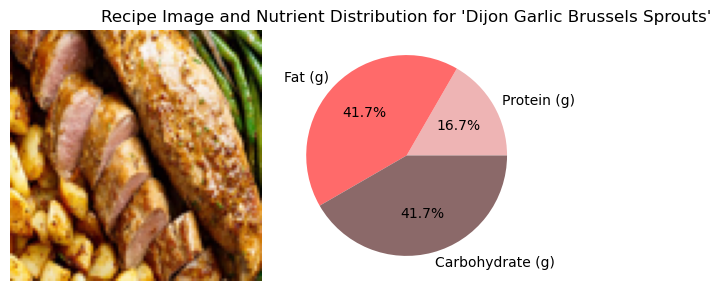

In [13]:
recommended_recipe(recommended_calories)